# Explanation of results for Moore-Penrose inverse when $N = d$

Using Singular Value Decomposition (SVD), the Moore Penrose pseudo-inverse of a matrix $A \in \mathbb{R}^{d \times d}$ can be computed as follows.

$$
A^{-} = V \Sigma ^{-} U^T,
$$

where $\Sigma ^{-}$ is a ${d \times d}$ diagonal matrix containing the reciprical eigenvalues of $A$, $V \in \mathbb{R}^{d \times d}$ and $U\in \mathbb{R}^{d \times d}$. Note that if there is a zero eigenvalue on the diagonal of $\Sigma$, then the corresponsing position of $\Sigma ^{-}$ will be set to zero.

In [3]:
import numpy as np
import est_dir
import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
def check_eigs(s):
    if np.any(s < 0.0000000001):
        rec_s = np.zeros((len(s)))
        pos = np.where(s < 0.0000000001)[0]
        for j in range(len(s)):
            if j in pos:
                rec_s[j] = 0
            else:
                rec_s[j] = 1 / s[j]
    else:
        rec_s = 1 / s
    return rec_s

In [9]:
np.random.seed(80)
m = 100
n_list = [50,100,150]
rec_eigs = np.zeros((len(n_list), 10, m+1))
max_eig = np.zeros((len(n_list), 10))
cond_number = np.zeros((len(n_list), 10))
no_vars = m
region = 0.1
const = 1
cov = np.identity((m))
lambda_max=1
noise_sd = 1
f = est_dir.quad_f_noise
index = 0
for n in n_list:
    for j in range(10):
        centre_point = np.random.multivariate_normal(np.zeros((m)), cov)
        minimizer = np.zeros((m, ))
        matrix = est_dir.quad_func_params(1, lambda_max, m)
        func_args = (minimizer, matrix, 0, noise_sd)
        act_design, y, positions, func_evals = (est_dir.compute_random_design
                                                (n, m, centre_point, no_vars,
                                                 f, func_args, region))
        full_act_design = np.ones((act_design.shape[0], act_design.shape[1] + 1))
        full_act_design[:, 1:] = act_design
        u, s, vh = np.linalg.svd(full_act_design.T @ full_act_design)
        assert(np.allclose(full_act_design.T @ full_act_design, (u* s) @ vh))
        rec_eigs[index, j] = check_eigs(s)
        max_eig[index, j] = np.max(rec_eigs[index, j])
        cond_number[index, j] = np.linalg.cond(full_act_design.T @ full_act_design)
    index += 1

In [18]:
rec_eigs[1]

array([[  0.00264442,   0.00285645,   0.00293577, ...,  19.50408595,
        249.67311904,   0.        ],
       [  0.00262276,   0.00277051,   0.0028907 , ...,   6.26155985,
          9.34899682,   0.        ],
       [  0.00264027,   0.0027214 ,   0.00292024, ...,  15.17038305,
         66.77578116,   0.        ],
       ...,
       [  0.00254388,   0.00266262,   0.00283632, ...,  13.39087558,
         20.43004983,   0.        ],
       [  0.00273341,   0.00291741,   0.00301838, ...,  32.88199305,
         53.82548286,   0.        ],
       [  0.00276596,   0.00278014,   0.00290036, ...,   9.42395881,
        288.93496276,   0.        ]])

Largest values on the diagonal of $\Sigma^{-}$ for $N=50, 100, 150$ with $d=100$

In [10]:
np.set_printoptions(suppress=True)
max_eig

array([[  0.08172187,   0.11175246,   0.10554423,   0.08763487,
          0.07823639,   0.10310705,   0.07893711,   0.08346836,
          0.07896364,   0.07442504],
       [249.67311904,   9.34899682,  66.77578116,  80.71416763,
         79.62423043,  15.30604978,  45.42243109,  20.43004983,
         53.82548286, 288.93496276],
       [  0.19456532,   0.15129639,   0.14396875,   0.14068277,
          0.17740046,   0.23623698,   0.17774858,   0.20408296,
          0.18626816,   0.21922098]])

In [12]:
def compute_boxplot(arr):
    plt.boxplot(arr.T)

# $N=50, d=100$

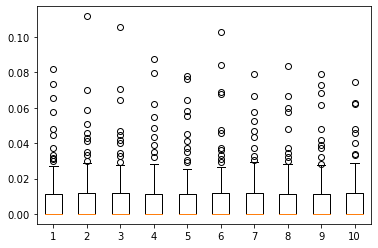

In [13]:
compute_boxplot(rec_eigs[0])

# $N=100, d=100$

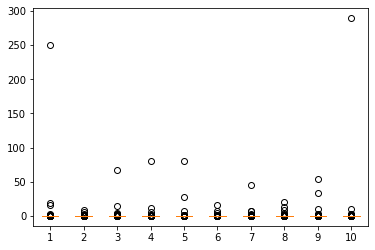

In [14]:
compute_boxplot(rec_eigs[1])

# $N=150, d=100$

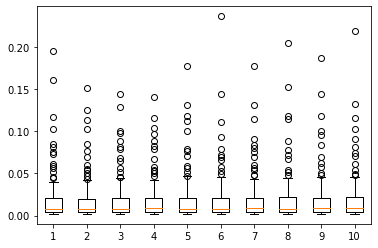

In [15]:
compute_boxplot(rec_eigs[2])

In [31]:
np.random.seed(80)
m = 100
n = 100
rec_eigs = np.zeros((len(n_list), 10, m+1))
max_eig = np.zeros((len(n_list), 10))
cond_number = np.zeros((len(n_list), 10))
no_vars = m
region = 0.1
const = 1
cov = np.identity((m))
lambda_max=1
noise_sd = 1
f = est_dir.quad_f_noise
index = 0
centre_point = np.random.multivariate_normal(np.zeros((m)), cov)
minimizer = np.zeros((m, ))
matrix = est_dir.quad_func_params(1, lambda_max, m)
func_args = (minimizer, matrix, 0, noise_sd)
act_design, y, positions, func_evals = (est_dir.compute_random_design
                                        (n, m, centre_point, no_vars,
                                         f, func_args, region))
full_act_design = np.ones((act_design.shape[0], act_design.shape[1] + 1))
full_act_design[:, 1:] = act_design
pseudo_inverse = np.linalg.pinv(full_act_design.T @ full_act_design)

In [32]:
np.max(abs(pseudo_inverse))

4.399429730942502

In [33]:
np.min(abs(pseudo_inverse))

0.0